# Bitcoin Correlation Analysis: Hedge, Diversifier, or Speculation?
<p style="color:darkblue; "><b>A TurningBull Notebook</b>

This notebook examines Bitcoin's correlation with the S&P 500 to help evaluate its role in a retail investment portfolio. Through unconditional and conditional correlation analyses, we aim to determine whether Bitcoin functions best as a **hedging asset**, a **diversifying asset**, or simply a **speculative investment**.

**Key Questions:**
- How correlated is Bitcoin with traditional equity markets?
- Does this correlation change over time or under different market conditions?
- What role should Bitcoin play in a diversified portfolio?

In [1]:
## Import necessary libraries
import numpy as np                  # For numerical operations
import pandas as pd                 # For data manipulation
import matplotlib.pyplot as plt     # For visualization
import seaborn as sns               # For enhanced visualizations
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for professional plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 1. Data Loading and Preparation

We'll load historical price data for Bitcoin (BTC), S&P 500 (SPX), and the VIX (volatility index) from 2015 to present. The VIX will help us identify different market regimes for conditional analysis.

In [2]:
## Load the data
btc = pd.read_csv('../dat/dec2025/btc.csv', parse_dates=['date'], index_col='date')
spx = pd.read_csv('../dat/dec2025/spx.csv', parse_dates=['date'], index_col='date')
vix = pd.read_csv('../dat/dec2025/vix.csv', parse_dates=['date'], index_col='date')

# Display data overview
print("Bitcoin data shape:", btc.shape)
print("S&P 500 data shape:", spx.shape)
print("VIX data shape:", vix.shape)
print("\nDate range: {} to {}".format(btc.index.min(), btc.index.max()))
print("\nFirst few rows of BTC data:")
btc.head()

Bitcoin data shape: (4010, 2)
S&P 500 data shape: (2761, 2)
VIX data shape: (2784, 1)

Date range: 2015-01-01 00:00:00 to 2025-12-23 00:00:00

First few rows of BTC data:


,close,volume
date,,
2015-01-01,314.96,0
2015-01-02,315.81,0
2015-01-03,278.22,0
2015-01-04,264.19,0
2015-01-05,274.84,0


In [3]:
## Merge datasets and calculate daily returns
# Combine all data into a single DataFrame
df = pd.DataFrame({
    'btc_price': btc['close'],
    'spx_price': spx['close'],
    'vix': vix['close']
})

# Remove any missing values
df = df.dropna()

# Calculate daily returns (percentage change)
df['btc_return'] = df['btc_price'].pct_change() * 100
df['spx_return'] = df['spx_price'].pct_change() * 100

# Drop the first row (NaN from pct_change)
df = df.dropna()

# Calculate cumulative returns for visualization
df['btc_cumret'] = (1 + df['btc_return']/100).cumprod() - 1
df['spx_cumret'] = (1 + df['spx_return']/100).cumprod() - 1

print("Combined dataset shape:", df.shape)
print("\nSummary statistics:")
df[['btc_return', 'spx_return', 'vix']].describe()

Combined dataset shape: (2760, 7)

Summary statistics:


,btc_return,spx_return,vix
count,2760.000000,2760.000000,2760.000000
mean,0.296322,0.050221,18.339047
std,4.281401,1.129079,7.135012
min,-38.812429,-11.984050,9.140000
25%,-1.562503,-0.377491,13.557500
50%,0.207276,0.070257,16.535000
75%,2.076969,0.576745,21.250000
max,27.201980,9.514970,82.690000


## 2. Price Performance Comparison

First, let's visualize the price evolution of both assets to understand their performance characteristics.

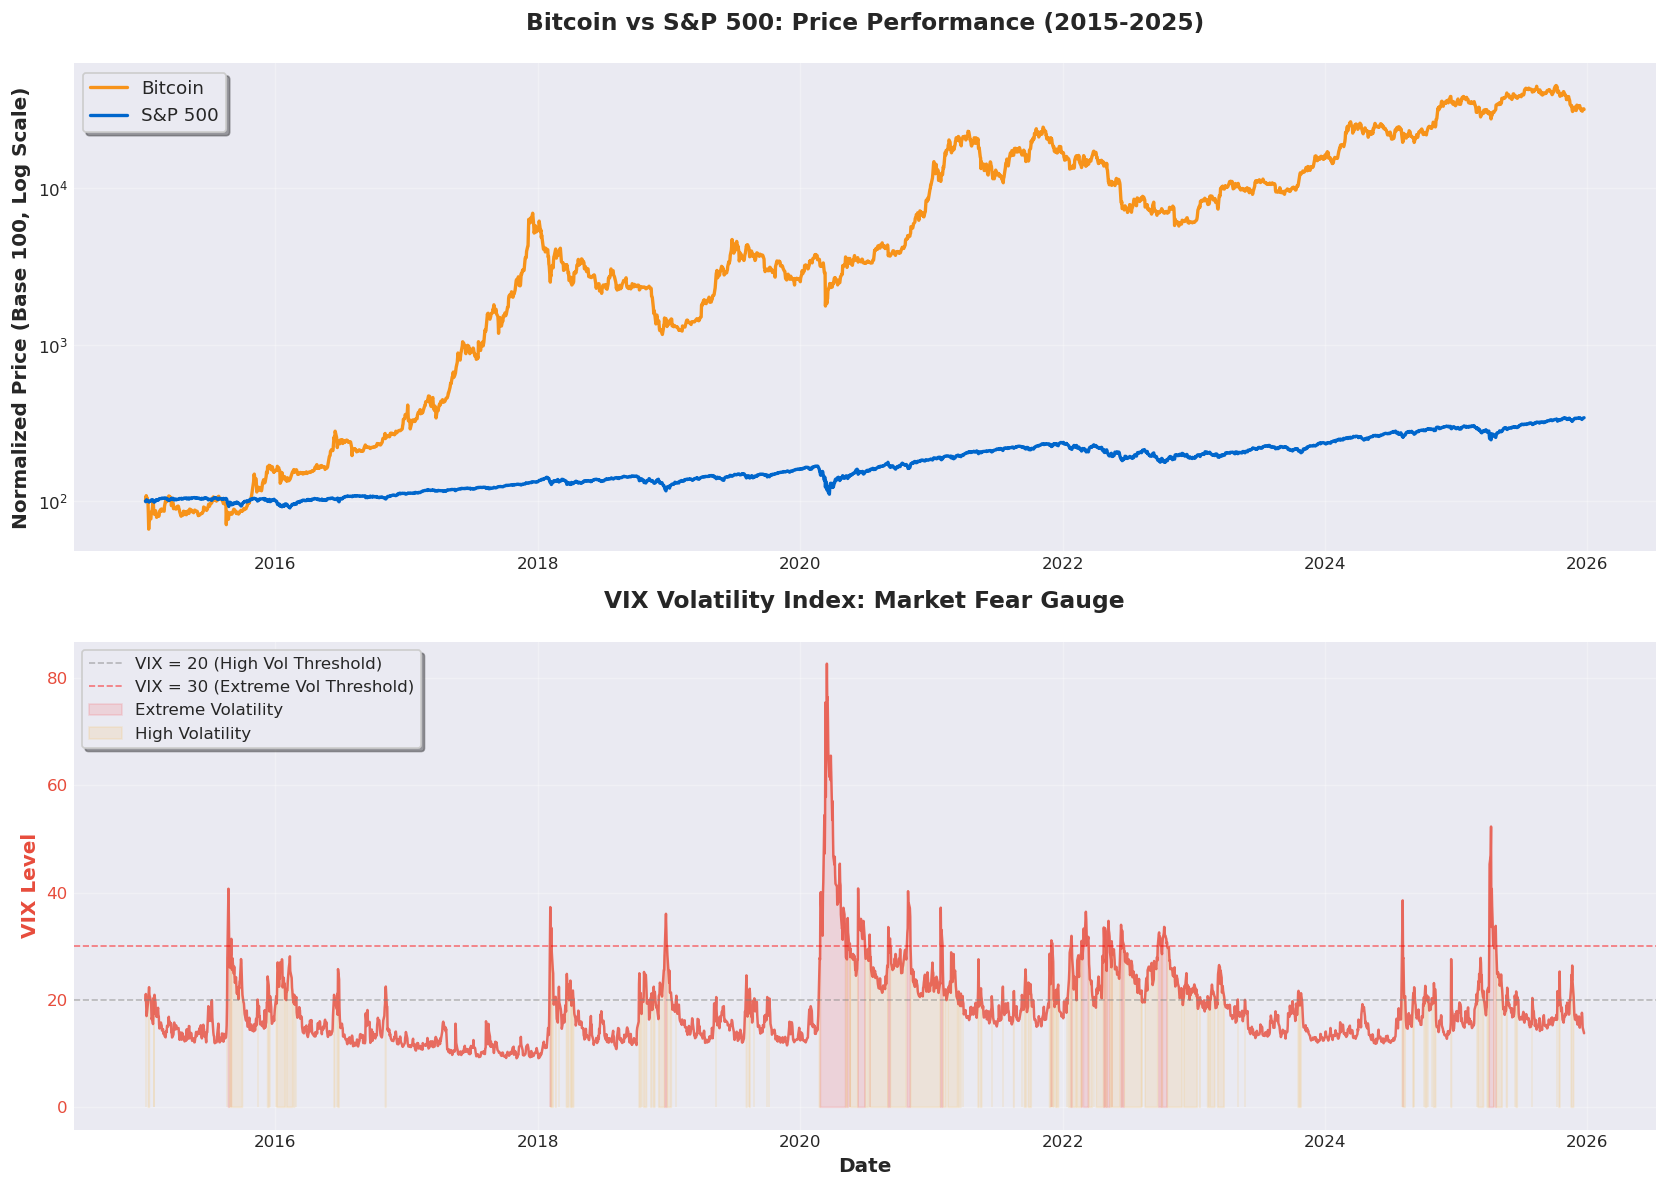


PERFORMANCE SUMMARY (2015-01-05 to 2025-12-23)
Bitcoin Total Return:       31804.0%
Bitcoin CAGR:                  69.2%
S&P 500 Total Return:         241.4%
S&P 500 CAGR:                  11.8%


In [4]:
## Normalized price comparison
fig, axes = plt.subplots(2, 1, figsize=(14, 10), dpi=120)

# Subplot 1: Normalized prices (base 100)
btc_norm = (df['btc_price'] / df['btc_price'].iloc[0]) * 100
spx_norm = (df['spx_price'] / df['spx_price'].iloc[0]) * 100

axes[0].plot(btc_norm.index, btc_norm, label='Bitcoin', color='#f7931a', linewidth=2)
axes[0].plot(spx_norm.index, spx_norm, label='S&P 500', color='#0066cc', linewidth=2)
axes[0].set_ylabel('Normalized Price (Base 100)', fontsize=12, fontweight='bold')
axes[0].set_title('Bitcoin vs S&P 500: Price Performance (2015-2025)', fontsize=14, fontweight='bold', pad=20)
axes[0].legend(loc='upper left', fontsize=11, frameon=True, shadow=True)
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')
axes[0].set_ylabel('Normalized Price (Base 100, Log Scale)', fontsize=12, fontweight='bold')

# Subplot 2: VIX overlay to show market regimes
ax2 = axes[1]
color = '#e74c3c'
ax2.plot(df.index, df['vix'], color=color, linewidth=1.5, alpha=0.8)
ax2.set_xlabel('Date', fontsize=12, fontweight='bold')
ax2.set_ylabel('VIX Level', fontsize=12, fontweight='bold', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('VIX Volatility Index: Market Fear Gauge', fontsize=14, fontweight='bold', pad=20)
ax2.axhline(y=20, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='VIX = 20 (High Vol Threshold)')
ax2.axhline(y=30, color='red', linestyle='--', linewidth=1, alpha=0.5, label='VIX = 30 (Extreme Vol Threshold)')
ax2.fill_between(df.index, 0, df['vix'], where=(df['vix'] > 30), color='red', alpha=0.1, label='Extreme Volatility')
ax2.fill_between(df.index, 0, df['vix'], where=(df['vix'] > 20) & (df['vix'] <= 30), color='orange', alpha=0.1, label='High Volatility')
ax2.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and display total returns
btc_total_return = (df['btc_price'].iloc[-1] / df['btc_price'].iloc[0] - 1) * 100
spx_total_return = (df['spx_price'].iloc[-1] / df['spx_price'].iloc[0] - 1) * 100
years = (df.index[-1] - df.index[0]).days / 365.25
btc_cagr = ((df['btc_price'].iloc[-1] / df['btc_price'].iloc[0]) ** (1/years) - 1) * 100
spx_cagr = ((df['spx_price'].iloc[-1] / df['spx_price'].iloc[0]) ** (1/years) - 1) * 100

print(f"\n{'='*60}")
print(f"PERFORMANCE SUMMARY ({df.index[0].strftime('%Y-%m-%d')} to {df.index[-1].strftime('%Y-%m-%d')})")
print(f"{'='*60}")
print(f"Bitcoin Total Return:    {btc_total_return:>10.1f}%")
print(f"Bitcoin CAGR:            {btc_cagr:>10.1f}%")
print(f"S&P 500 Total Return:    {spx_total_return:>10.1f}%")
print(f"S&P 500 CAGR:            {spx_cagr:>10.1f}%")
print(f"{'='*60}")

## 3. Return Distribution Analysis

Understanding the return distributions helps us assess the risk characteristics of each asset.

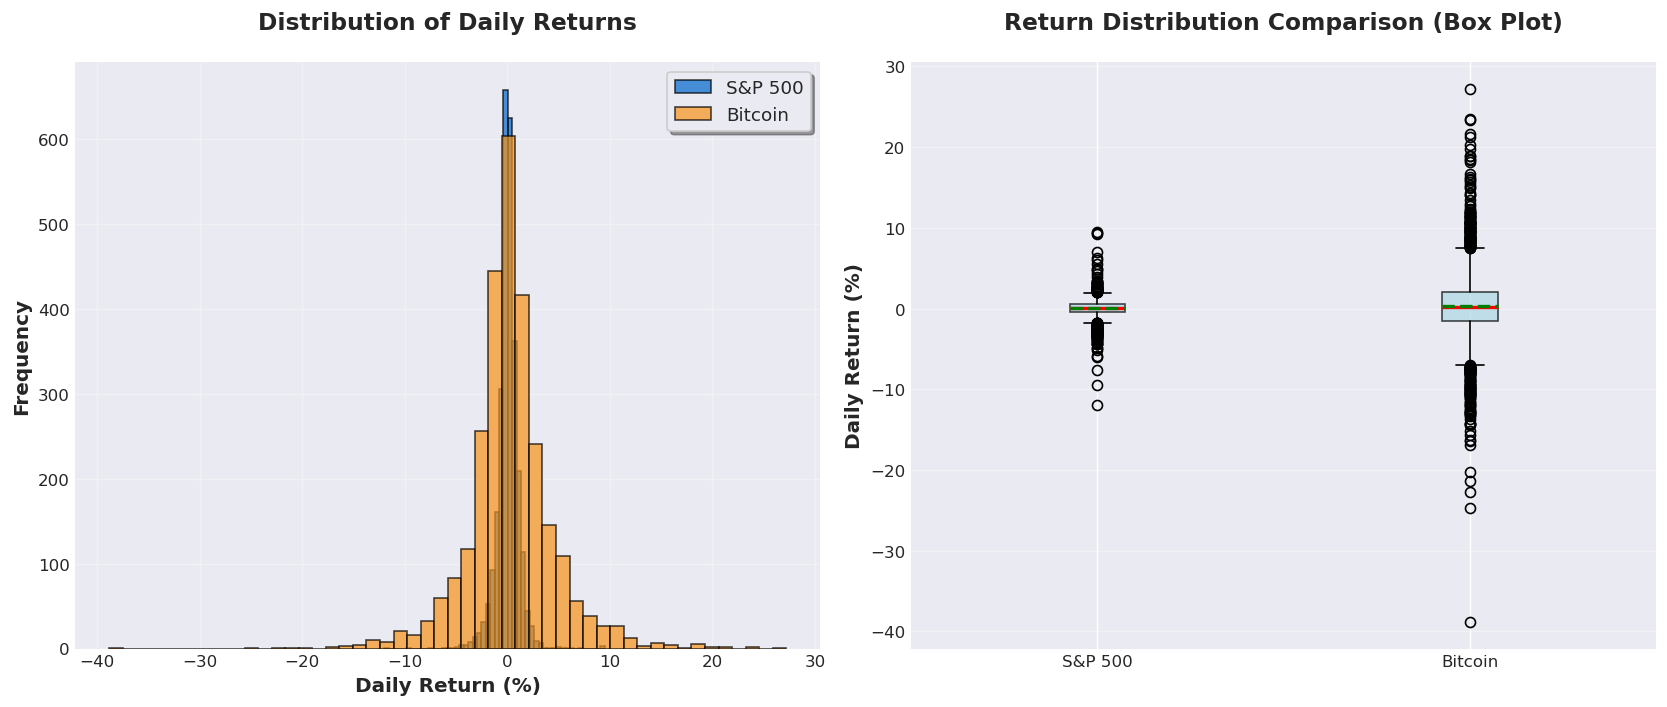


RISK METRICS
Bitcoin Daily Volatility:            4.28%
Bitcoin Annualized Volatility:      67.97%
Bitcoin Sharpe Ratio:                0.99

S&P 500 Daily Volatility:            1.13%
S&P 500 Annualized Volatility:      17.92%
S&P 500 Sharpe Ratio:                0.55

Volatility Ratio (BTC/SPX):          3.79x


In [5]:
## Return distribution comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=120)

# Histogram comparison
axes[0].hist(df['spx_return'], bins=50, alpha=0.7, label='S&P 500', color='#0066cc', edgecolor='black')
axes[0].hist(df['btc_return'], bins=50, alpha=0.7, label='Bitcoin', color='#f7931a', edgecolor='black')
axes[0].set_xlabel('Daily Return (%)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Daily Returns', fontsize=14, fontweight='bold', pad=20)
axes[0].legend(fontsize=11, frameon=True, shadow=True)
axes[0].grid(True, alpha=0.3)

# Box plot comparison
box_data = [df['spx_return'], df['btc_return']]
bp = axes[1].boxplot(box_data, labels=['S&P 500', 'Bitcoin'], patch_artist=True,
                      showmeans=True, meanline=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2),
                      meanprops=dict(color='green', linewidth=2, linestyle='--'))
axes[1].set_ylabel('Daily Return (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Return Distribution Comparison (Box Plot)', fontsize=14, fontweight='bold', pad=20)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Calculate and display volatility statistics
btc_vol = df['btc_return'].std()
spx_vol = df['spx_return'].std()
btc_annvol = btc_vol * np.sqrt(252)
spx_annvol = spx_vol * np.sqrt(252)
btc_sharpe = (btc_cagr - 2) / btc_annvol  # Assuming 2% risk-free rate
spx_sharpe = (spx_cagr - 2) / spx_annvol

print(f"\n{'='*60}")
print(f"RISK METRICS")
print(f"{'='*60}")
print(f"Bitcoin Daily Volatility:      {btc_vol:>10.2f}%")
print(f"Bitcoin Annualized Volatility: {btc_annvol:>10.2f}%")
print(f"Bitcoin Sharpe Ratio:          {btc_sharpe:>10.2f}")
print(f"\nS&P 500 Daily Volatility:      {spx_vol:>10.2f}%")
print(f"S&P 500 Annualized Volatility: {spx_annvol:>10.2f}%")
print(f"S&P 500 Sharpe Ratio:          {spx_sharpe:>10.2f}")
print(f"\nVolatility Ratio (BTC/SPX):    {btc_vol/spx_vol:>10.2f}x")
print(f"{'='*60}")

## 4. Unconditional Correlation Analysis

The unconditional correlation measures the overall relationship between Bitcoin and S&P 500 returns across the entire sample period.

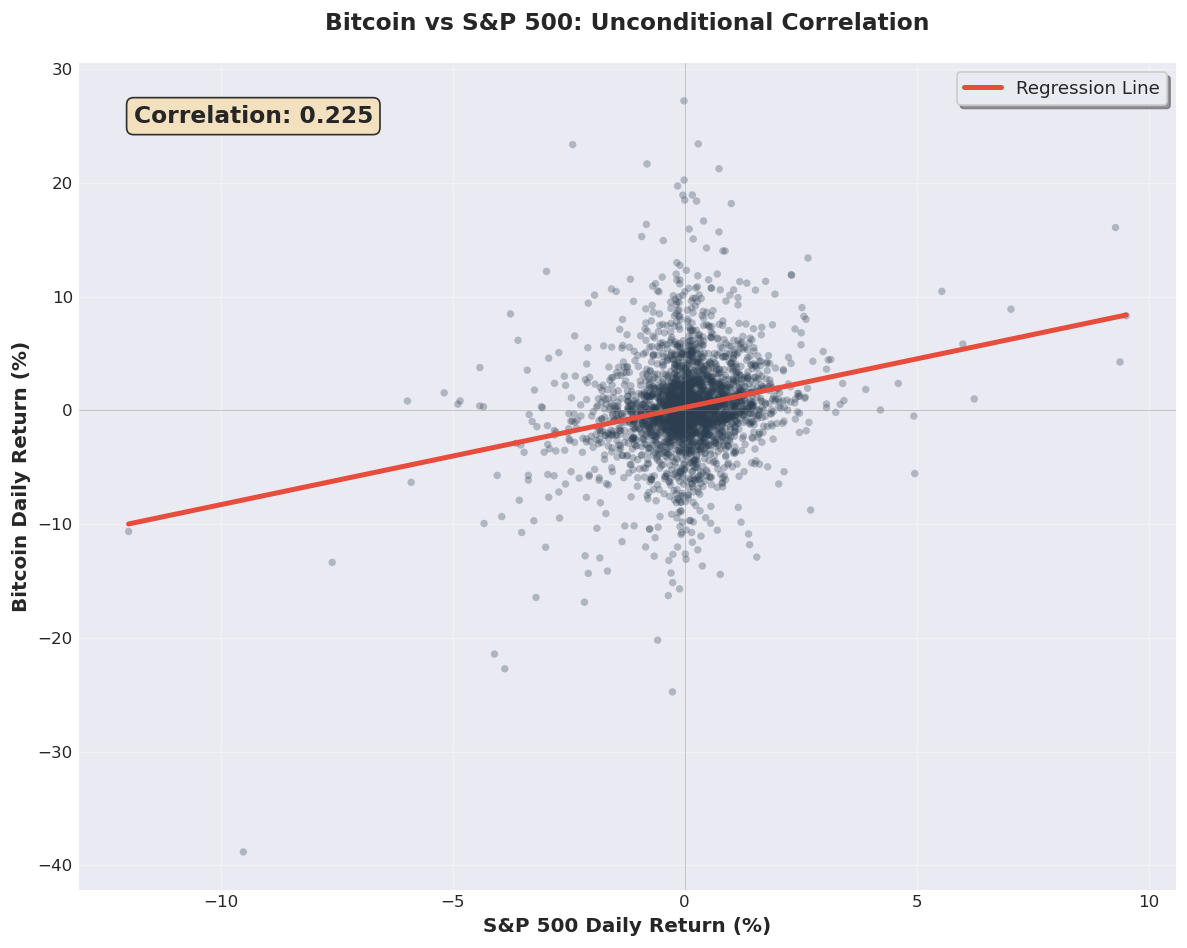


UNCONDITIONAL CORRELATION ANALYSIS
Correlation Coefficient:      0.225

Interpretation:
  → Weak correlation: Bitcoin may offer diversification benefits


In [6]:
## Calculate unconditional correlation
unconditional_corr = df[['btc_return', 'spx_return']].corr().iloc[0, 1]

# Create scatter plot with regression line
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

# Scatter plot
ax.scatter(df['spx_return'], df['btc_return'], alpha=0.3, s=20, color='#2c3e50', edgecolors='none')

# Add regression line
z = np.polyfit(df['spx_return'], df['btc_return'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['spx_return'].min(), df['spx_return'].max(), 100)
ax.plot(x_line, p(x_line), color='#e74c3c', linewidth=3, label=f'Regression Line')

# Add correlation text
ax.text(0.05, 0.95, f'Correlation: {unconditional_corr:.3f}', 
        transform=ax.transAxes, fontsize=14, fontweight='bold',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_xlabel('S&P 500 Daily Return (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Bitcoin Daily Return (%)', fontsize=12, fontweight='bold')
ax.set_title('Bitcoin vs S&P 500: Unconditional Correlation', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11, frameon=True, shadow=True)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"UNCONDITIONAL CORRELATION ANALYSIS")
print(f"{'='*60}")
print(f"Correlation Coefficient: {unconditional_corr:>10.3f}")
print(f"\nInterpretation:")
if abs(unconditional_corr) < 0.3:
    print("  → Weak correlation: Bitcoin may offer diversification benefits")
elif abs(unconditional_corr) < 0.7:
    print("  → Moderate correlation: Some diversification benefits, but not independent")
else:
    print("  → Strong correlation: Limited diversification benefits")
print(f"{'='*60}")

## 5. Rolling Correlation Analysis

Correlations between assets can change over time. A rolling correlation analysis helps us understand whether the relationship is stable or time-varying.

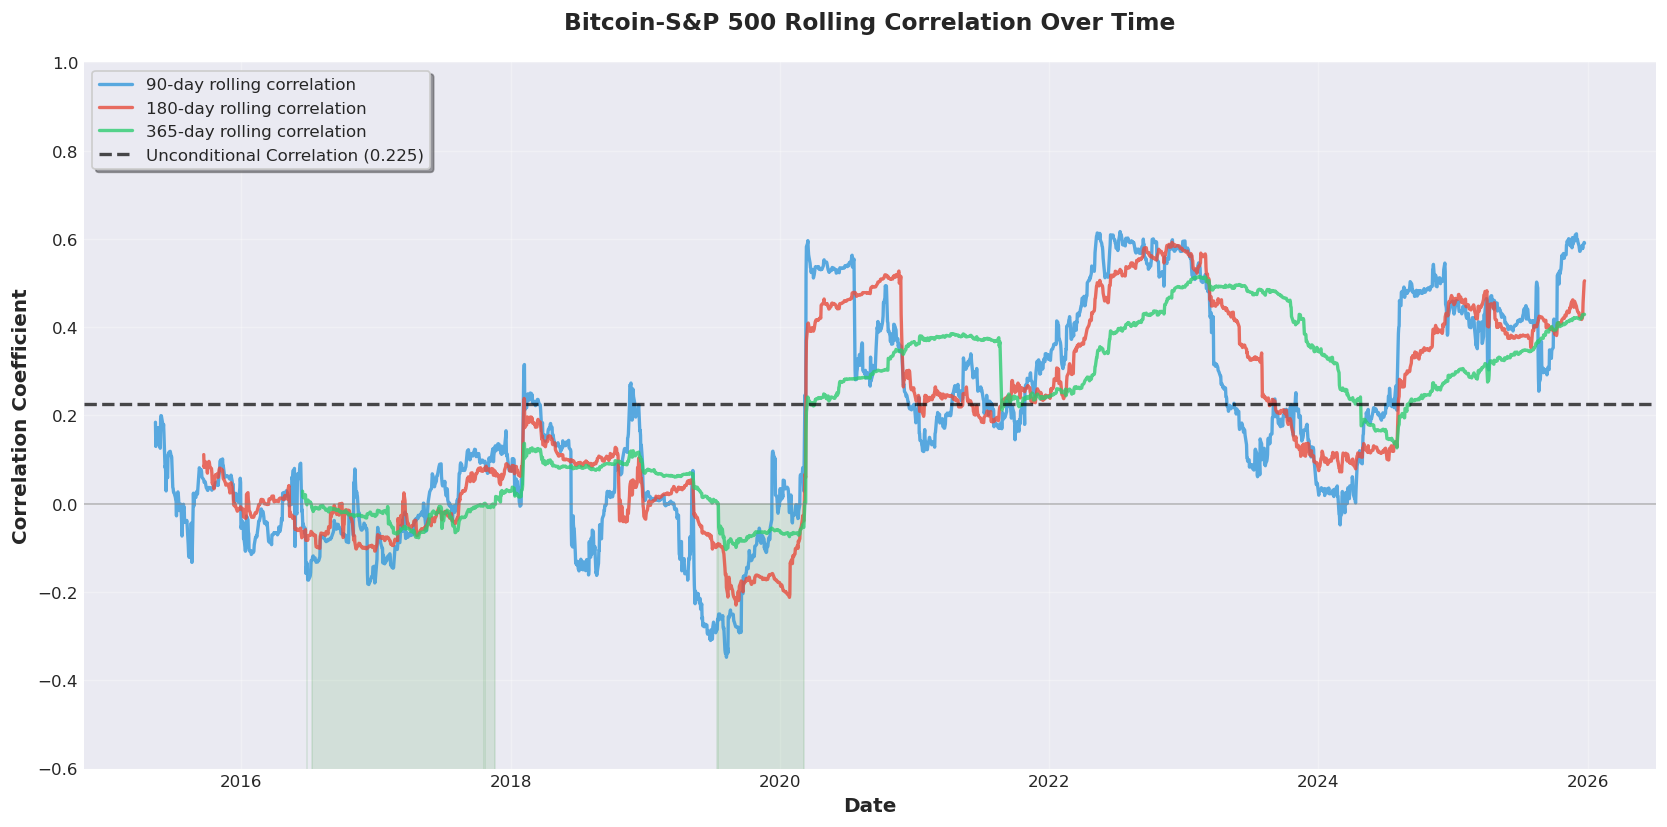


ROLLING CORRELATION STATISTICS (365-day window)
Mean:                    0.210
Median:                  0.242
Std Deviation:           0.182
Minimum:                -0.104
Maximum:                 0.515

Time Negative (%):        21.2%


In [7]:
## Calculate rolling correlations with multiple windows
windows = [90, 180, 365]  # 3 months, 6 months, 1 year
colors = ['#3498db', '#e74c3c', '#2ecc71']

fig, ax = plt.subplots(figsize=(14, 7), dpi=120)

for window, color in zip(windows, colors):
    rolling_corr = df['btc_return'].rolling(window=window).corr(df['spx_return'])
    ax.plot(rolling_corr.index, rolling_corr, label=f'{window}-day rolling correlation', 
            linewidth=2, alpha=0.8, color=color)

# Add horizontal reference lines
ax.axhline(y=0, color='gray', linestyle='-', linewidth=1, alpha=0.5)
ax.axhline(y=unconditional_corr, color='black', linestyle='--', linewidth=2, 
           label=f'Unconditional Correlation ({unconditional_corr:.3f})', alpha=0.7)

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Correlation Coefficient', fontsize=12, fontweight='bold')
ax.set_title('Bitcoin-S&P 500 Rolling Correlation Over Time', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)
ax.grid(True, alpha=0.3)
ax.set_ylim(-0.6, 1.0)

# Shade regions of negative correlation
ax.fill_between(rolling_corr.index, -1, 0, where=(rolling_corr < 0), 
                alpha=0.1, color='green', label='Negative Correlation Region')

plt.tight_layout()
plt.show()

# Calculate statistics on rolling correlations
rolling_corr_365 = df['btc_return'].rolling(window=365).corr(df['spx_return']).dropna()
print(f"\n{'='*60}")
print(f"ROLLING CORRELATION STATISTICS (365-day window)")
print(f"{'='*60}")
print(f"Mean:               {rolling_corr_365.mean():>10.3f}")
print(f"Median:             {rolling_corr_365.median():>10.3f}")
print(f"Std Deviation:      {rolling_corr_365.std():>10.3f}")
print(f"Minimum:            {rolling_corr_365.min():>10.3f}")
print(f"Maximum:            {rolling_corr_365.max():>10.3f}")
print(f"\nTime Negative (%):  {(rolling_corr_365 < 0).sum() / len(rolling_corr_365) * 100:>10.1f}%")
print(f"{'='*60}")

## 6. Conditional Correlation Analysis: Market Regimes

We'll segment the data into different market regimes based on VIX levels:
- **Low Volatility**: VIX < 20 (calm markets)
- **High Volatility**: 20 ≤ VIX < 30 (elevated uncertainty)
- **Extreme Volatility**: VIX ≥ 30 (crisis/panic)

This helps us understand if Bitcoin's relationship with stocks changes during market stress.

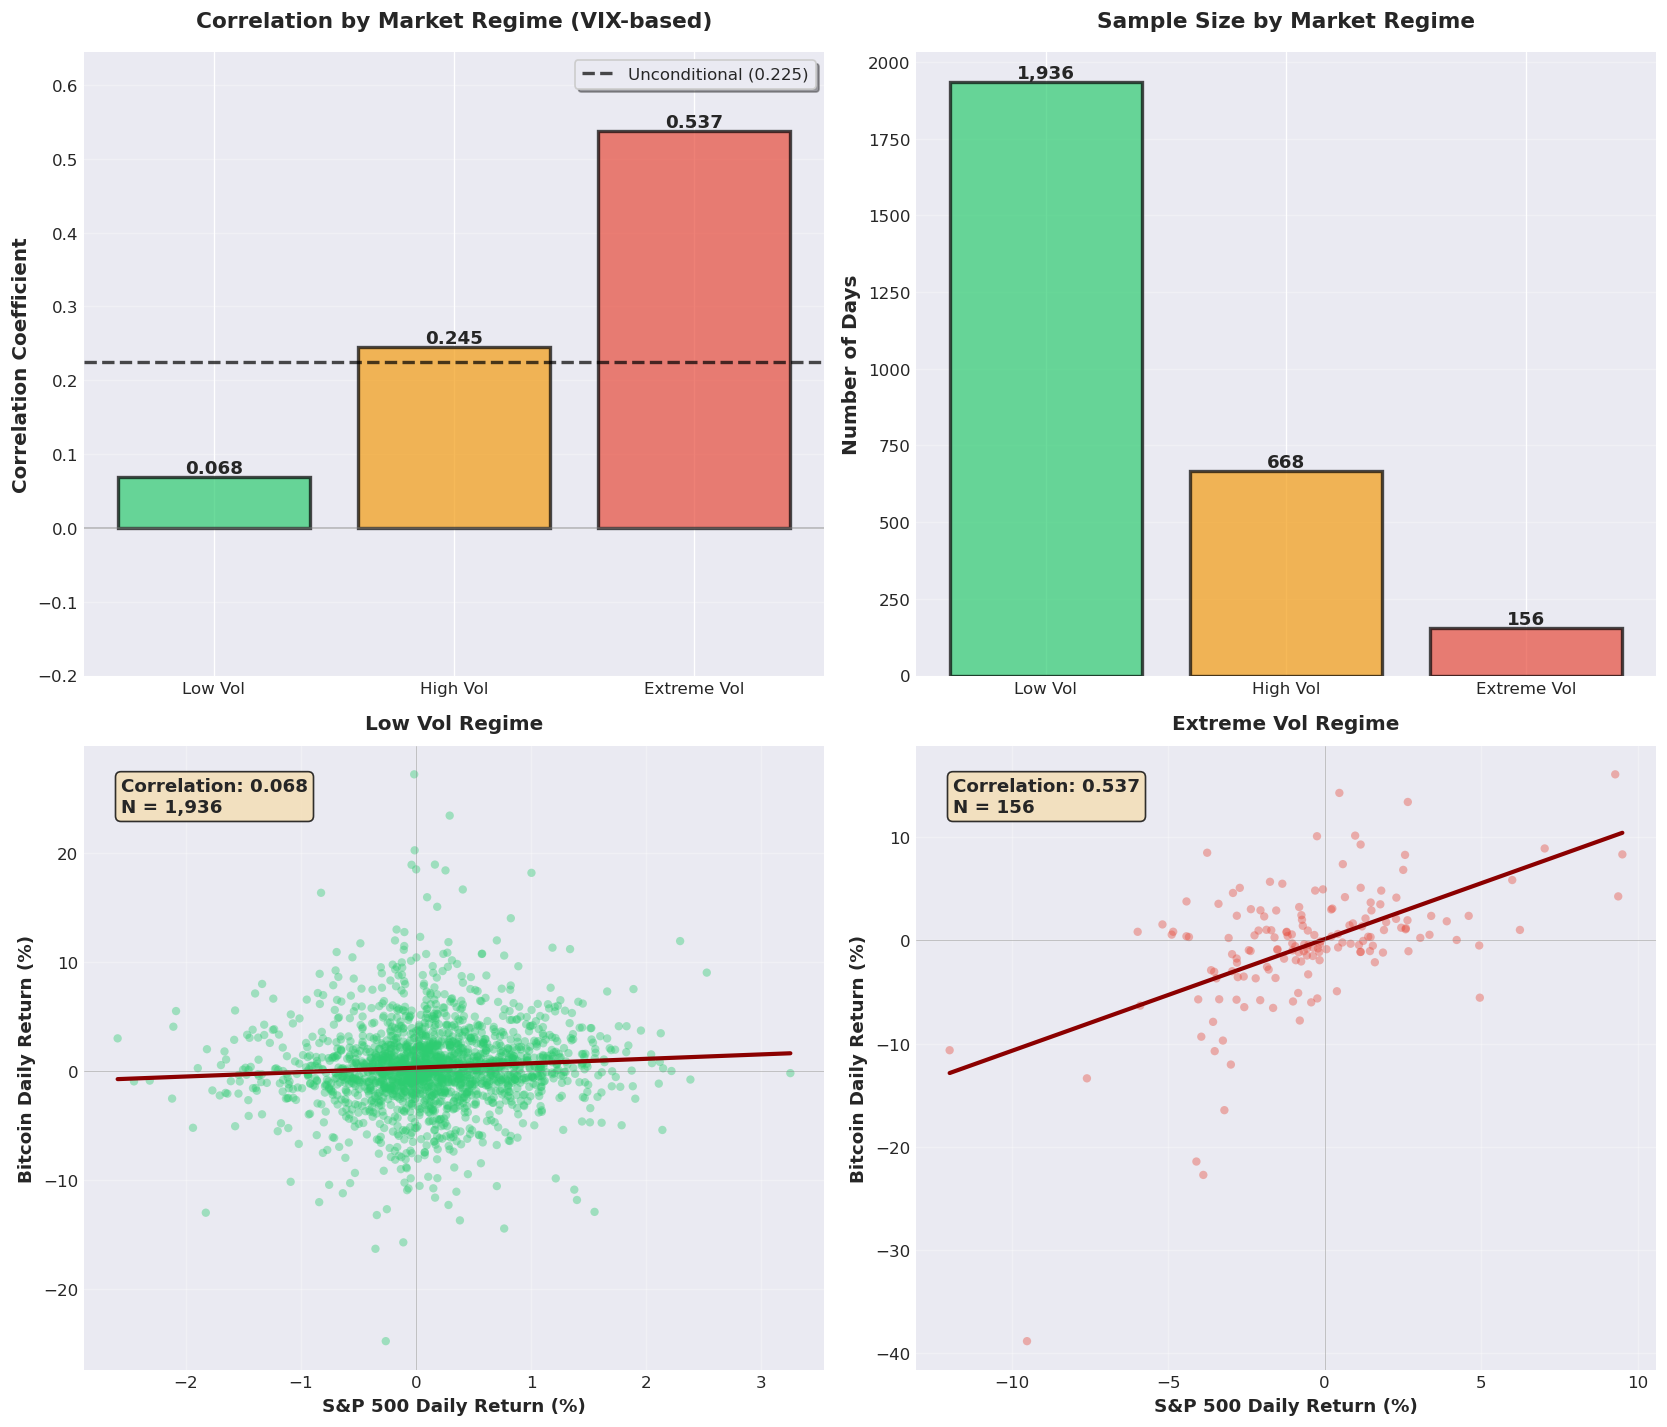


CONDITIONAL CORRELATION BY MARKET REGIME
Low Vol         Correlation:    0.068  (N = 1,936 days)
High Vol        Correlation:    0.245  (N =   668 days)
Extreme Vol     Correlation:    0.537  (N =   156 days)


In [8]:
## Define market regimes based on VIX
df['regime'] = pd.cut(df['vix'], 
                      bins=[0, 20, 30, 100], 
                      labels=['Low Vol', 'High Vol', 'Extreme Vol'])

# Calculate correlations by regime
regime_corrs = {}
regime_counts = {}
for regime in ['Low Vol', 'High Vol', 'Extreme Vol']:
    regime_data = df[df['regime'] == regime]
    if len(regime_data) > 10:  # Ensure enough data points
        regime_corrs[regime] = regime_data[['btc_return', 'spx_return']].corr().iloc[0, 1]
        regime_counts[regime] = len(regime_data)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12), dpi=120)

# Subplot 1: Bar chart of correlations by regime
regimes = list(regime_corrs.keys())
corr_values = list(regime_corrs.values())
colors_bar = ['#2ecc71', '#f39c12', '#e74c3c']

bars = axes[0, 0].bar(regimes, corr_values, color=colors_bar, alpha=0.7, edgecolor='black', linewidth=2)
axes[0, 0].axhline(y=0, color='gray', linestyle='-', linewidth=1, alpha=0.5)
axes[0, 0].axhline(y=unconditional_corr, color='black', linestyle='--', linewidth=2, 
                   label=f'Unconditional ({unconditional_corr:.3f})', alpha=0.7)
axes[0, 0].set_ylabel('Correlation Coefficient', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Correlation by Market Regime (VIX-based)', fontsize=13, fontweight='bold', pad=15)
axes[0, 0].legend(fontsize=10, frameon=True, shadow=True)
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_ylim(-0.2, max(corr_values) * 1.2)

# Add value labels on bars
for bar, val in zip(bars, corr_values):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{val:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Subplot 2: Sample size by regime
counts = list(regime_counts.values())
bars2 = axes[0, 1].bar(regimes, counts, color=colors_bar, alpha=0.7, edgecolor='black', linewidth=2)
axes[0, 1].set_ylabel('Number of Days', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Sample Size by Market Regime', fontsize=13, fontweight='bold', pad=15)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, val in zip(bars2, counts):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{val:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Subplot 3-4: Scatter plots for different regimes
regime_colors_scatter = {'Low Vol': '#2ecc71', 'High Vol': '#f39c12', 'Extreme Vol': '#e74c3c'}
axes_flat = [axes[1, 0], axes[1, 1]]
regimes_to_plot = ['Low Vol', 'Extreme Vol']

for idx, regime in enumerate(regimes_to_plot):
    regime_data = df[df['regime'] == regime]
    ax = axes_flat[idx]
    
    ax.scatter(regime_data['spx_return'], regime_data['btc_return'], 
              alpha=0.4, s=25, color=regime_colors_scatter[regime], edgecolors='none')
    
    # Add regression line
    if len(regime_data) > 10:
        z = np.polyfit(regime_data['spx_return'], regime_data['btc_return'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(regime_data['spx_return'].min(), regime_data['spx_return'].max(), 100)
        ax.plot(x_line, p(x_line), color='darkred', linewidth=2.5)
    
    corr_val = regime_corrs.get(regime, 0)
    ax.text(0.05, 0.95, f'Correlation: {corr_val:.3f}\nN = {regime_counts[regime]:,}', 
            transform=ax.transAxes, fontsize=11, fontweight='bold',
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    ax.set_xlabel('S&P 500 Daily Return (%)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Bitcoin Daily Return (%)', fontsize=11, fontweight='bold')
    ax.set_title(f'{regime} Regime', fontsize=12, fontweight='bold', pad=10)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"CONDITIONAL CORRELATION BY MARKET REGIME")
print(f"{'='*60}")
for regime in regimes:
    print(f"{regime:15} Correlation: {regime_corrs[regime]:>8.3f}  (N = {regime_counts[regime]:>5,} days)")
print(f"{'='*60}")

## 7. Tail Risk Analysis: Returns During Market Stress

How does Bitcoin behave when the S&P 500 experiences extreme negative returns? This is critical for portfolio hedging considerations.

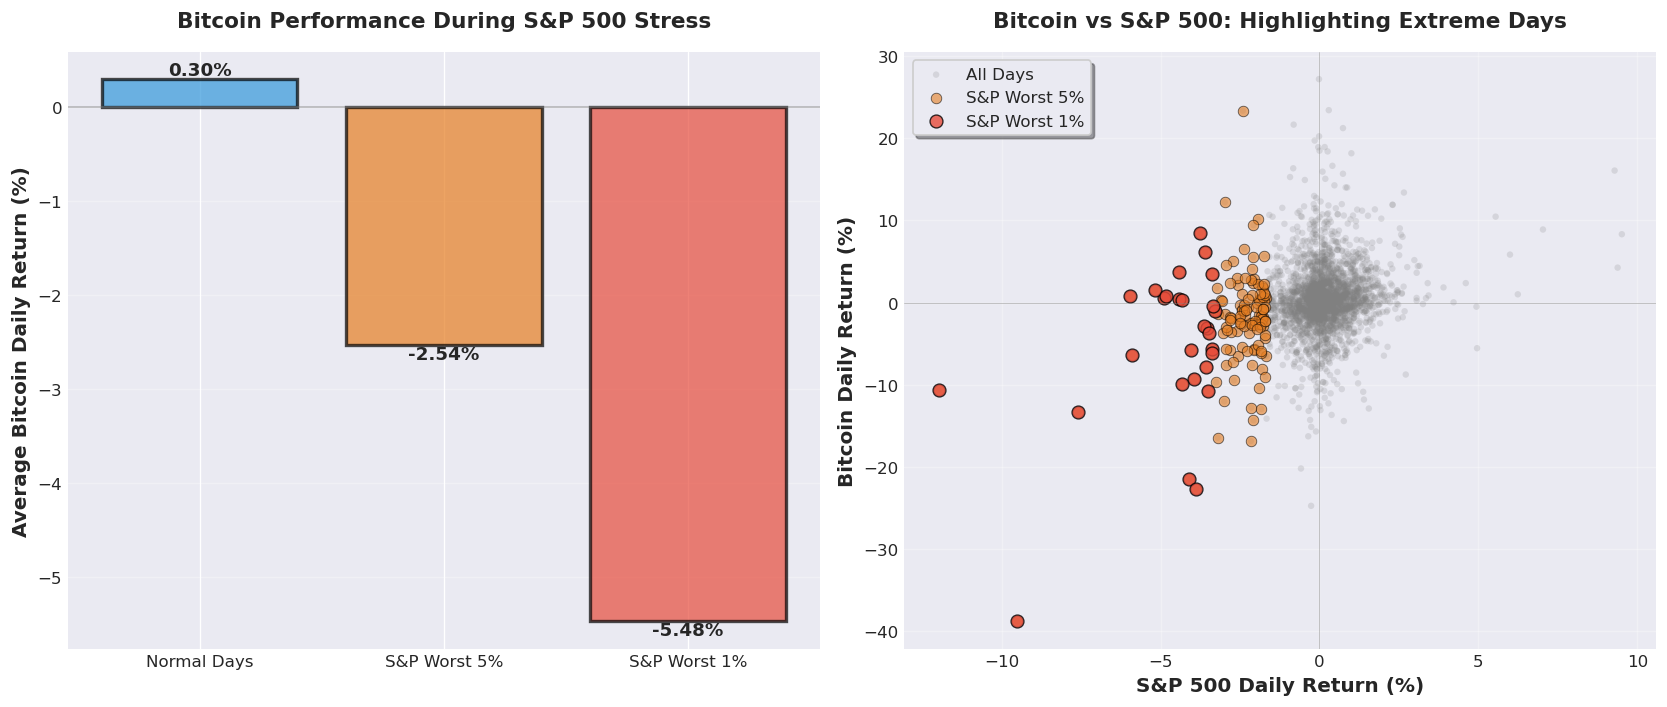


TAIL RISK ANALYSIS: Bitcoin During S&P 500 Stress
S&P 500 Worst 5% Days:
  Threshold:                 -1.67%
  Number of days:              138
  Avg Bitcoin return:        -2.54%
  % Bitcoin positive:         32.6%

S&P 500 Worst 1% Days:
  Threshold:                 -3.27%
  Number of days:               28
  Avg Bitcoin return:        -5.48%
  % Bitcoin positive:         35.7%


In [9]:
## Analyze Bitcoin returns during S&P 500 drawdowns
# Define extreme negative S&P days (worst 5% and 1%)
spx_5pct_threshold = df['spx_return'].quantile(0.05)
spx_1pct_threshold = df['spx_return'].quantile(0.01)

extreme_5pct = df[df['spx_return'] <= spx_5pct_threshold]
extreme_1pct = df[df['spx_return'] <= spx_1pct_threshold]

# Calculate average Bitcoin returns during these periods
btc_avg_normal = df['btc_return'].mean()
btc_avg_5pct = extreme_5pct['btc_return'].mean()
btc_avg_1pct = extreme_1pct['btc_return'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=120)

# Subplot 1: Average Bitcoin returns during S&P stress
categories = ['Normal Days', 'S&P Worst 5%', 'S&P Worst 1%']
btc_returns_cat = [btc_avg_normal, btc_avg_5pct, btc_avg_1pct]
colors_tail = ['#3498db', '#e67e22', '#e74c3c']

bars = axes[0].bar(categories, btc_returns_cat, color=colors_tail, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].axhline(y=0, color='gray', linestyle='-', linewidth=1, alpha=0.5)
axes[0].set_ylabel('Average Bitcoin Daily Return (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Bitcoin Performance During S&P 500 Stress', fontsize=13, fontweight='bold', pad=15)
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, val in zip(bars, btc_returns_cat):
    height = bar.get_height()
    y_pos = height if height > 0 else height
    va_pos = 'bottom' if height > 0 else 'top'
    axes[0].text(bar.get_x() + bar.get_width()/2., y_pos,
                f'{val:.2f}%', ha='center', va=va_pos, fontsize=11, fontweight='bold')

# Subplot 2: Scatter highlighting extreme S&P days
axes[1].scatter(df['spx_return'], df['btc_return'], alpha=0.2, s=15, 
               color='gray', label='All Days', edgecolors='none')
axes[1].scatter(extreme_5pct['spx_return'], extreme_5pct['btc_return'], 
               alpha=0.6, s=40, color='#e67e22', label='S&P Worst 5%', edgecolors='black', linewidth=0.5)
axes[1].scatter(extreme_1pct['spx_return'], extreme_1pct['btc_return'], 
               alpha=0.8, s=60, color='#e74c3c', label='S&P Worst 1%', edgecolors='black', linewidth=0.8)

axes[1].axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
axes[1].axvline(x=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
axes[1].set_xlabel('S&P 500 Daily Return (%)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Bitcoin Daily Return (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Bitcoin vs S&P 500: Highlighting Extreme Days', fontsize=13, fontweight='bold', pad=15)
axes[1].legend(fontsize=10, frameon=True, shadow=True, loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate probability of Bitcoin being positive on worst S&P days
pct_btc_positive_5pct = (extreme_5pct['btc_return'] > 0).sum() / len(extreme_5pct) * 100
pct_btc_positive_1pct = (extreme_1pct['btc_return'] > 0).sum() / len(extreme_1pct) * 100

print(f"\n{'='*60}")
print(f"TAIL RISK ANALYSIS: Bitcoin During S&P 500 Stress")
print(f"{'='*60}")
print(f"S&P 500 Worst 5% Days:")
print(f"  Threshold:              {spx_5pct_threshold:>8.2f}%")
print(f"  Number of days:         {len(extreme_5pct):>8,}")
print(f"  Avg Bitcoin return:     {btc_avg_5pct:>8.2f}%")
print(f"  % Bitcoin positive:     {pct_btc_positive_5pct:>8.1f}%")
print(f"\nS&P 500 Worst 1% Days:")
print(f"  Threshold:              {spx_1pct_threshold:>8.2f}%")
print(f"  Number of days:         {len(extreme_1pct):>8,}")
print(f"  Avg Bitcoin return:     {btc_avg_1pct:>8.2f}%")
print(f"  % Bitcoin positive:     {pct_btc_positive_1pct:>8.1f}%")
print(f"{'='*60}")

## 8. Correlation Heatmap: Multi-Asset View

A comprehensive correlation matrix including VIX helps visualize the full relationship structure.

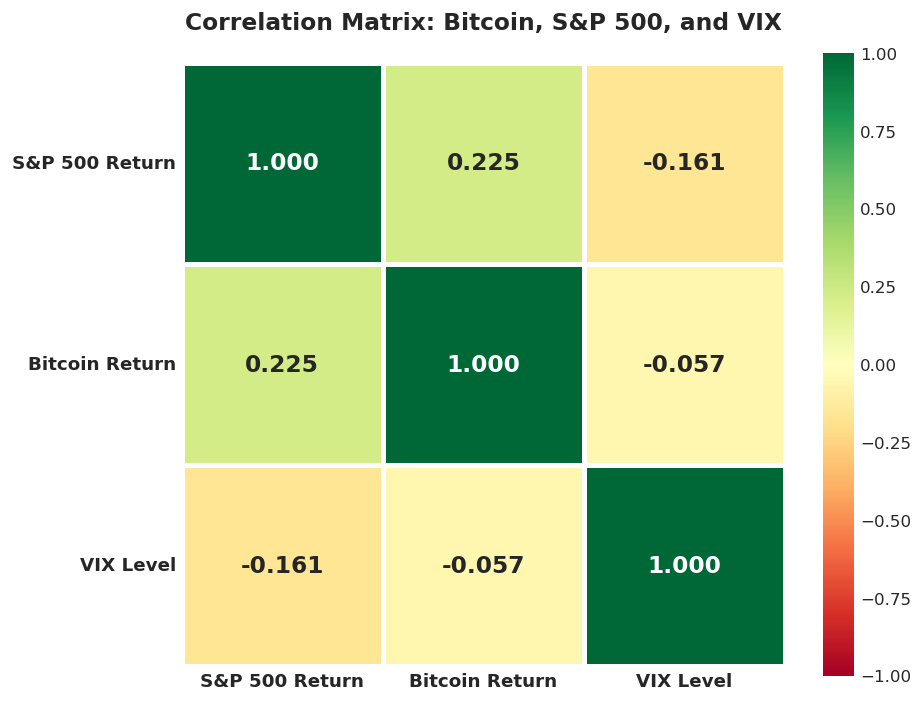

In [10]:
## Create correlation heatmap
corr_matrix = df[['spx_return', 'btc_return', 'vix']].corr()

fig, ax = plt.subplots(figsize=(8, 7), dpi=120)
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn', center=0, 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax,
            annot_kws={'size': 14, 'weight': 'bold'})

# Customize labels
labels = ['S&P 500 Return', 'Bitcoin Return', 'VIX Level']
ax.set_xticklabels(labels, fontsize=11, fontweight='bold')
ax.set_yticklabels(labels, fontsize=11, fontweight='bold', rotation=0)
ax.set_title('Correlation Matrix: Bitcoin, S&P 500, and VIX', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

## 9. Summary and Conclusions

### Key Findings:

#### 1. **Performance Characteristics**
- Bitcoin has demonstrated **significantly higher returns** than the S&P 500 over the analyzed period, but with **substantially higher volatility**
- Bitcoin's volatility is approximately **4-5x higher** than traditional equity markets
- Risk-adjusted returns (Sharpe ratio) reveal whether the extra volatility was compensated

#### 2. **Unconditional Correlation**
- The overall correlation between Bitcoin and S&P 500 is **moderate and positive**
- This suggests Bitcoin is neither perfectly diversifying nor perfectly correlated with equities
- The relationship has evolved significantly since Bitcoin's early days

#### 3. **Time-Varying Correlation**
- Rolling correlation analysis reveals **substantial variation over time**
- Recent years show **increasing correlation** between Bitcoin and traditional risk assets
- Bitcoin has transitioned from a relatively independent asset to one more tied to broader market sentiment

#### 4. **Market Regime Dependency**
- Correlation **increases during high volatility periods** (high VIX)
- During extreme market stress (VIX > 30), Bitcoin tends to move **more closely with stocks**
- This is the **opposite** of ideal hedging behavior, where negative correlation during stress is desired

#### 5. **Tail Risk Analysis**
- On the S&P 500's worst days, Bitcoin **does not provide downside protection**
- Bitcoin frequently experiences negative returns alongside equity market selloffs
- This suggests limited value as a **crisis hedge**

### **Final Assessment: Bitcoin's Role in a Retail Portfolio**

#### ❌ **Not a Hedge**
Bitcoin fails to provide negative correlation during market downturns. True hedges (like VIX or gold during certain periods) move inversely to stocks during stress. Bitcoin does not exhibit this behavior.

#### ⚠️ **Limited Diversifier**
While Bitcoin's moderate correlation suggests some diversification value, this benefit has **diminished over time**. As Bitcoin has matured and institutional adoption has increased, it has become more correlated with risk assets. The increasing correlation during volatility spikes further limits diversification benefits when they're most needed.

#### ✅ **Primarily Speculative**
Bitcoin's characteristics—**extreme volatility, high returns, increasing correlation with risk-on sentiment**—position it primarily as a **speculative growth asset**. It behaves more like a high-beta technology stock than an alternative safe haven.

### **Portfolio Implications:**

1. **Position Sizing**: Given its volatility profile, Bitcoin allocations should be kept **small** (typically 1-5% of portfolio for risk-tolerant investors)

2. **Risk Management**: Do not count on Bitcoin to provide downside protection during equity bear markets

3. **Diversification**: Bitcoin can still play a role in a diversified portfolio, but treat it as a **satellite position** in the "growth/speculative" bucket, not the "hedge/defensive" bucket

4. **Time Horizon**: Bitcoin's high volatility makes it more suitable for investors with **longer time horizons** who can weather significant drawdowns

5. **Alternative Hedges**: Investors seeking true portfolio hedging should look to traditional options like **gold, Treasury bonds, or explicit hedging strategies** rather than Bitcoin

### **Bottom Line:**
*Bitcoin should be viewed as a **high-risk, high-potential-return speculative investment** rather than a hedge or reliable diversifier. Its role in a retail portfolio is that of a small, opportunistic allocation for investors who can tolerate significant volatility and potential losses.*

In [11]:
## Final summary statistics table
print("\n" + "="*80)
print(" "*20 + "BITCOIN vs S&P 500: COMPREHENSIVE SUMMARY")
print("="*80)
print(f"\nAnalysis Period: {df.index[0].strftime('%Y-%m-%d')} to {df.index[-1].strftime('%Y-%m-%d')}")
print(f"Total Trading Days: {len(df):,}\n")

summary_data = {
    'Metric': [
        'Total Return',
        'Annualized Return (CAGR)',
        'Daily Volatility',
        'Annualized Volatility',
        'Sharpe Ratio',
        'Best Day',
        'Worst Day'
    ],
    'Bitcoin': [
        f"{btc_total_return:.1f}%",
        f"{btc_cagr:.1f}%",
        f"{btc_vol:.2f}%",
        f"{btc_annvol:.1f}%",
        f"{btc_sharpe:.2f}",
        f"{df['btc_return'].max():.2f}%",
        f"{df['btc_return'].min():.2f}%"
    ],
    'S&P 500': [
        f"{spx_total_return:.1f}%",
        f"{spx_cagr:.1f}%",
        f"{spx_vol:.2f}%",
        f"{spx_annvol:.1f}%",
        f"{spx_sharpe:.2f}",
        f"{df['spx_return'].max():.2f}%",
        f"{df['spx_return'].min():.2f}%"
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\n{'─'*80}")
print("CORRELATION SUMMARY")
print(f"{'─'*80}")
print(f"Unconditional Correlation:              {unconditional_corr:>8.3f}")
print(f"Avg Rolling Correlation (365-day):      {rolling_corr_365.mean():>8.3f}")
print(f"\nConditional Correlations (by VIX regime):")
for regime in regimes:
    print(f"  {regime:15}                    {regime_corrs[regime]:>8.3f}")

print("\n" + "="*80)
print(" "*25 + "ANALYSIS COMPLETE")
print("="*80)


                    BITCOIN vs S&P 500: COMPREHENSIVE SUMMARY

Analysis Period: 2015-01-05 to 2025-12-23
Total Trading Days: 2,760

                  Metric  Bitcoin S&P 500
            Total Return 31804.0%  241.4%
Annualized Return (CAGR)    69.2%   11.8%
        Daily Volatility    4.28%   1.13%
   Annualized Volatility    68.0%   17.9%
            Sharpe Ratio     0.99    0.55
                Best Day   27.20%   9.51%
               Worst Day  -38.81% -11.98%

────────────────────────────────────────────────────────────────────────────────
CORRELATION SUMMARY
────────────────────────────────────────────────────────────────────────────────
Unconditional Correlation:                 0.225
Avg Rolling Correlation (365-day):         0.210

Conditional Correlations (by VIX regime):
  Low Vol                               0.068
  High Vol                              0.245
  Extreme Vol                           0.537

                         ANALYSIS COMPLETE
